## **Differentiation in python: Symbolic, Numerical and Automatic**

### **Functions in python**

$f\left(x\right) = x^2$

In [1]:
def f(x):
    return x ** 2

In [2]:
f(3)

9

In [4]:
def dfdx(x):
    return 2 * x

In [5]:
dfdx(3)

6

In [6]:
import numpy as np

x_arr = np.array([1, 2, 3])

f(x_arr), dfdx(x_arr)

(array([1, 4, 9]), array([2, 4, 6]))

In [7]:
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.        
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()

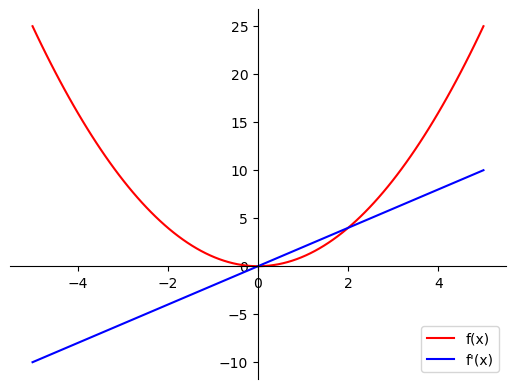

In [8]:
plot_f1_and_f2(f, dfdx)

### **Symbolic differentiation in python**

**Symbolic computation** deals with the computation of mathematical objects that are represented exactly, not approximately (e.g. $\sqrt{2}$ will be written as it is, not as $1.41421356237$)

#### **Introduction to Symbolic Computation with `SymPy`**

In [9]:
import math

In [10]:
math.sqrt(18)

4.242640687119285

In [11]:
from sympy import *

In [12]:
sqrt(18)

3*sqrt(2)

In [13]:
N(sqrt(18), 8)

4.2426407

In [14]:
x, y = symbols('x y')
expr = 2 * x ** 2 - x * y

In [15]:
expr

2*x**2 - x*y

In [16]:
expr_manipul = x * (expr + x * y + x ** 3)

In [17]:
expr_manipul

x*(x**3 + 2*x**2)

In [18]:
expand(expr_manipul)

x**4 + 2*x**3

In [19]:
factor(expr_manipul)

x**3*(x + 2)

In [20]:
expr.evalf(subs = {
    x: -1,
    y: 2
})

4.00000000000000

In [21]:
f_symb = x ** 2
f_symb.evalf(subs = {
    x: 3
})

9.00000000000000

In [22]:
x_arr

array([1, 2, 3])

In [23]:
try:
    f_symb(x_arr)
except TypeError as err:
    print(err)

'Pow' object is not callable


In [24]:
from sympy.utilities.lambdify import lambdify

In [25]:
f_symb_numpy = lambdify(x, f_symb, 'numpy')

In [26]:
x_arr, f_symb_numpy(x_arr)

(array([1, 2, 3]), array([1, 4, 9]))